## Diabetes Prediction Project

### 1. Data collection

<P>The very first step is to choose the dataset for our model .<br>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict whether a patient has diabetes based on diagnostic measurements. Several constraints were placed on the selection of these instances from a larger database.<br> In particular, all patients here are females at least 21 years old of Pima Indian heritage.</P>

#### Import the required libraries

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle

<P> Load the diabetes dataset to a pandas DataFrame</P>

In [2]:
diabetes_dataset = pd.read_csv('./assets/dataset/diabetes.csv') 

<P>Print the first 5 rows of the dataset.</P>

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<P>Print the last 5 rows of the dataset.</P>

In [4]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<P>To get the number of rows and columns in the dataset</P

In [7]:
diabetes_dataset.shape

(768, 9)

<p>The data contains 9 columns which are as follows<br></p>

**Pregnancies**: Number of times pregnant  
**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
**BloodPressure**: Diastolic blood pressure (mm Hg)  
**SkinThickness**: Triceps skin fold thickness (mm)  
**Insulin**: 2-Hour serum insulin (mu U/ml)  
**BMI**: Body mass index (weight in kg/(height in m)^2)  
**DiabetesPedigreeFunction**: Diabetes pedigree function  
**Age**: Age (years)  
**Outcome**: Class variable (0 or 1)  

In [8]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_dataset.duplicated().any()

False

#### To get the statistical measures of the data

In [10]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<p>And, it is clear that the Outcome column is the output variable. So let us explore more details about that column.</p>

#### To get details of the outcome column

In [11]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<p>In the output, the value 1 means the person is having Diabetes, and 0 means the person is not having Diabetes. We can see the total count of people with and without Diabetes.</p>

### 3. Splitting the data

<p>The next step in the building of the Machine learning model is splitting the data into training and testing sets. The training and testing data should be split in a ratio of 3:1 for better prediction results.</p>

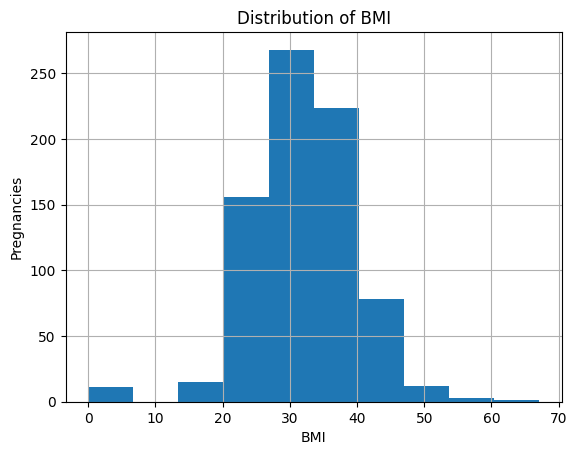

In [12]:
import matplotlib.pyplot as plt
diabetes_dataset["BMI"].hist(bins=10)  # Adjust bin number as needed
plt.xlabel("BMI")
plt.ylabel("Pregnancies")
plt.title("Distribution of BMI")
plt.show()

<p>Separating the data and labels</p>

In [13]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

#### To print the independent variables

In [14]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


#### To print the outcome variable

In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Split the data into train and test

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [17]:
# Build the model
classifier = svm.SVC(kernel='linear')

# Train the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7833876221498371
Accuracy score of the test data :  0.7727272727272727


In [19]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# Change the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\nishk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


#### Save the trained model

In [20]:
filename = 'diabetesClassifier.sav'
pickle.dump(classifier, open(f"./assets/model/{filename}", 'wb'))

#### Load the saved model

In [21]:
loaded_model = pickle.load(open('./assets/model/diabetesClassifier.sav', 'rb'))